# Data Science Project On Handwritten Digits Recognition

# Business Case

* Handwritten digit recognition plays a crucial role in automation, efficiency, and accuracy across multiple industries.
* MNIST contains a total of 70,000 images. This dataset is typically split into 60,000 training images and 10,000 testing images
* The dataset consists of 28x28 pixel grayscale images of handwritten digits (0 through 9). Each image is a 2D array, and each pixel represents the intensity of the grayscale (usually ranging from 0 to 255).
* MNIST is often used as a benchmark dataset for developing and testing image classification algorithms, particularly for handwritten digit recognition. It serves as a simple yet effective starting point for learning and experimentation.
* MNIST has become a standard benchmark for evaluating the performance of various machine learning and deep learning models, especially in the early stages of learning. It's a common dataset for understanding and implementing image classification techniques.
* The implementation of machine learning and deep learning models, particularly Convolutional Neural Networks (CNNs), enables rapid and accurate
  digit recognition from handwritten images.
* This project aims to leverage the MNIST dataset to build an efficient digit recognition model with high accuracy.

# Domain Analysis
* The MNIST database (Modified National Institute of Standards and Technology database) of handwritten digits consists of a training set of 60,000
  examples and a test set of 10,000 examples.
* It is a subset of a larger set available from NIST.
* Additionally, the black and white images from NIST were size-normalized and centered to fit into a 28x28 pixel bounding box and anti-aliased, which
  introduced grayscale levels.
* A domain analysis of handwritten digits image processing data reveals that it is a complex, multi-faceted dataset characterized by variations in
writing style, digit shape, size, and orientation, often influenced by factors like individual handwriting variations, pen pressure, and writing
instrument.
* It making accurate classification challenging but crucial for applications like automated check processing or document digitization.
* The primary focus is extracting meaningful features from these images to identify and classify digits (0-9) using techniques like convolutional
     neural networks(CNNs) which excel at recognizing spatial patterns within images.
  

## Technological Approach

* Deep Learning (CNNs): Ideal for image classification tasks.
* Machine Learning Algorithms (SVM, KNN, Random Forest): Used for benchmarking and comparative analysis.
* Image Preprocessing Techniques: Normalization, grayscale conversion, and noise reduction to improve accuracy.
* Evaluation Metrics: Accuracy, Precision, Recall, and F1-score to assess model performance.


#### CNN Architecture for Handwritten Digit Recognition
* Input Image (28x28)

A grayscale 28x28 pixel image is the input.
Preprocessing (resizing, normalization) ensures consistency for CNN processing.

* Convolutional Layers + ReLU

Apply 3x3 filters to detect edges, curves, and patterns.
ReLU activation introduces non-linearity for learning complex patterns.

* Max Pooling Layers (2x2, Stride 2)

Reduces spatial dimensions, making the model robust to small variations.
Helps prevent overfitting and reduces computational complexity.

* Feature Map Transformation

Feature maps shrink in size but increase in depth, capturing hierarchical features.
Example: 32x28x28 → 32x14x14 → 64x14x14 → 64x7x7

* Flatten Layer

Converts feature maps into a 1D vector for classification.
Fully Connected Layers (Dense Layers)

Learn high-level representations for classification.
Example: 3136x128 → 128x10 (10 digit classes)
Output Layer (Softmax Activation)

10 nodes representing digit classes (0-9).
Outputs a probability distribution for classification.

<img src='https://miro.medium.com/v2/resize:fit:1200/1*SGPGG7oeSvVlV5sOSQ2iZw.png'>

### Understanding Grayscale Images
##### Intensity Levels:

Each pixel in a grayscale image has an intensity value ranging from 0 to 255.
0 (black) represents no light, while 255 (white) represents maximum light.
Values in between represent different shades of gray.

##### Pixel Values:

The intensity value at each pixel determines how bright or dark that pixel appears.
Lower values (0-127) = Darker Shades
Higher values (128-255) = Lighter Shades

##### Single Channel:

Unlike RGB images (which have 3 channels for Red, Green, and Blue), grayscale images have only 1 channel.
This single channel stores brightness information for each pixel.

                                                 
##### Image Representation:
Grayscale images are represented as a 2D array (height × width).
Each value in this array corresponds to a pixel’s intensity level.
Example: A 28×28 image (like in MNIST) has 784 pixels, each with a grayscale value.

## Importing Libraries

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load MNIST dataset

In [12]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [13]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [14]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

## Normalizing the data

In [15]:
train_images=train_images.astype('float32') / 255
test_images=test_images.astype('float32') / 255

In [16]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [17]:
## One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Exploratory Data Analysis (EDA)

<ipython-input-19-6a8a502b7c12>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="rainbow")


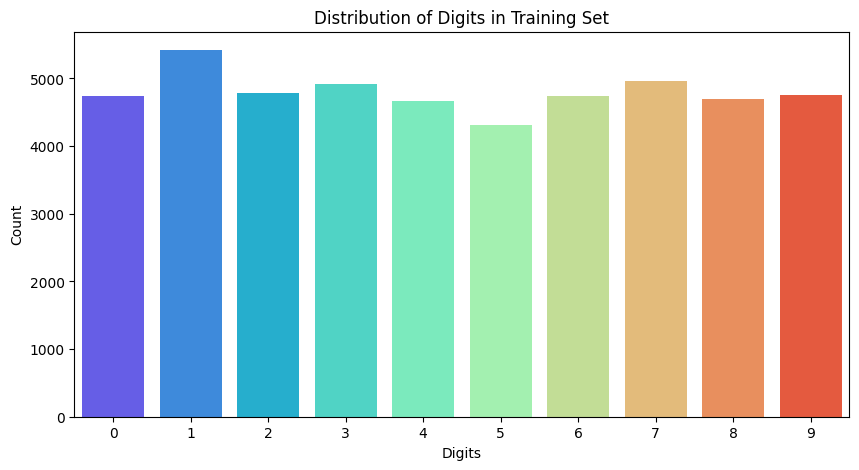

In [19]:
import seaborn as sns
original_labels = np.argmax(train_labels, axis=1)

label_counts = pd.Series(original_labels).value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="rainbow")

# Add titles and labels
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digits")
plt.ylabel("Count")
plt.show()

*  The Digit Distribution Diagram helps us understand how well the dataset represents each digit class.
* A balanced distribution ensures that the model learns equally for all digits, leading to better accuracy and performance.

# Data Preprocessing :-

* Data preprocessing in handwritten image recognition refers to the techniques used to clean, transform, and standardize handwritten image data before feeding it into a machine learning model.
* This process ensures that the model receives properly formatted and optimized input for accurate digit or character recognition.
* It ensures that the data is consistent, free of errors, and optimized for better model performance.    

### 1) Checking for missing and corrupted images

* In the context of handwritten image recognition, ensuring the integrity of image datasets is crucial for accurate model training and evaluation.
* Missing or corrupted images can introduce noise, bias, and errors in the learning process.

In [20]:
print("Mean pixel value:", np.mean(train_images))
print("Standard deviation of pixel values:", np.std(train_images))
print(f"Missing values in train: {np.isnan(train_images).sum()}")
print(f"Missing values in test: {np.isnan(test_images).sum()}")

Mean pixel value: 0.13074532
Standard deviation of pixel values: 0.3082132
Missing values in train: 0
Missing values in test: 0


# Visualize some data

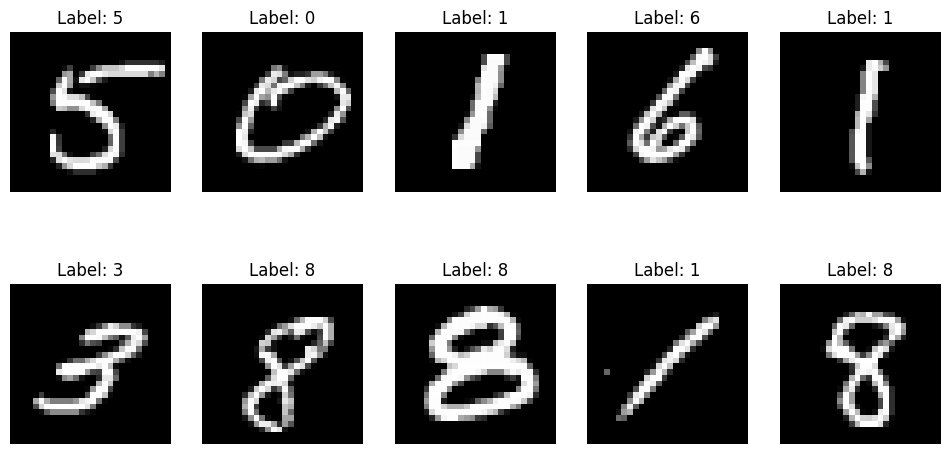

In [21]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    # Access data using indexing for NumPy arrays
    img = train_images[i].reshape(28, 28)  # Reshape to original image dimensions
    ax.imshow(img, cmap='gray')

    # Convert one-hot encoded labels to a single digit
    label = np.argmax(train_labels[i])

    ax.set_title(f"Label: {label}")  # Display correct label
    ax.axis('off')

plt.show()

# CNN Model
* Building a model for handwritten image recognition involves defining a deep learning architecture capable of extracting meaningful features from images and classifying them accurately.
* Convolutional Neural Networks (CNNs) are the most effective models for this handwritten image recognition.
* Model architecture in handwritten image recognition refers to the structured design of a deep learning model that processes handwritten images, extracts meaningful features, and classifies them into different categories

### Compiling the data
Compiling a model in handwritten image recognition refers to the process of configuring the learning process by specifying the optimizer,
loss function, and evaluation metrics before training.
This step prepares the neural network to learn patterns from handwritten images.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


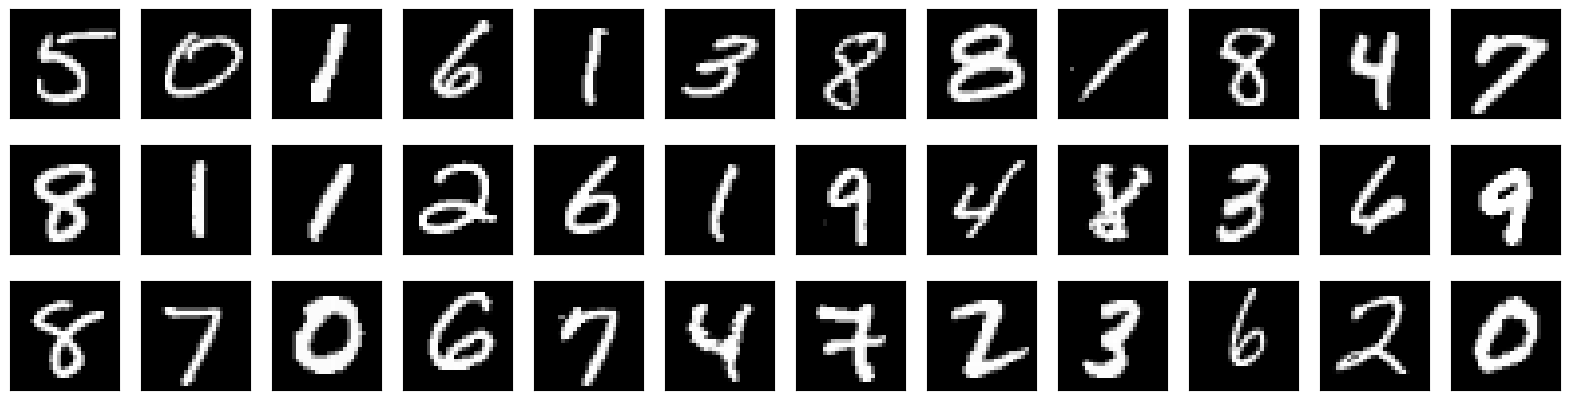

In [22]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(train_images[i]),cmap='gray')

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
history=model.fit(train_images,train_labels,epochs=15,batch_size=64,validation_data=(val_images, val_labels))

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7916 - loss: 0.6374 - val_accuracy: 0.9808 - val_loss: 0.0650
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9693 - loss: 0.1033 - val_accuracy: 0.9858 - val_loss: 0.0450
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9789 - loss: 0.0716 - val_accuracy: 0.9864 - val_loss: 0.0461
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9834 - loss: 0.0557 - val_accuracy: 0.9891 - val_loss: 0.0382
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9869 - loss: 0.0445 - val_accuracy: 0.9896 - val_loss: 0.0363
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9881 - loss: 0.0411 - val_accuracy: 0.9912 - val_loss: 0.0316
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9891 - loss: 0.0369 - val_accuracy: 0.9917 - val_loss: 0.0303
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9916 - loss: 0.0263 - val_accuracy: 0

In [25]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Model Accuracy

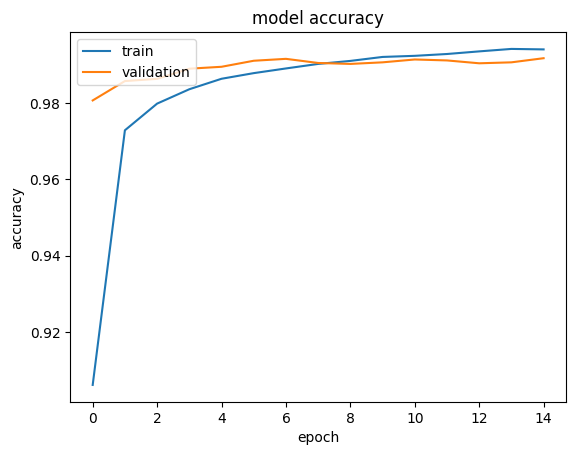

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.show()

# Model Loss

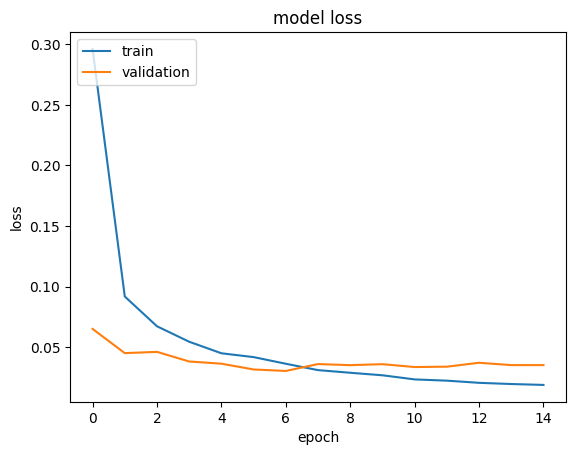

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [28]:
y_pred=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


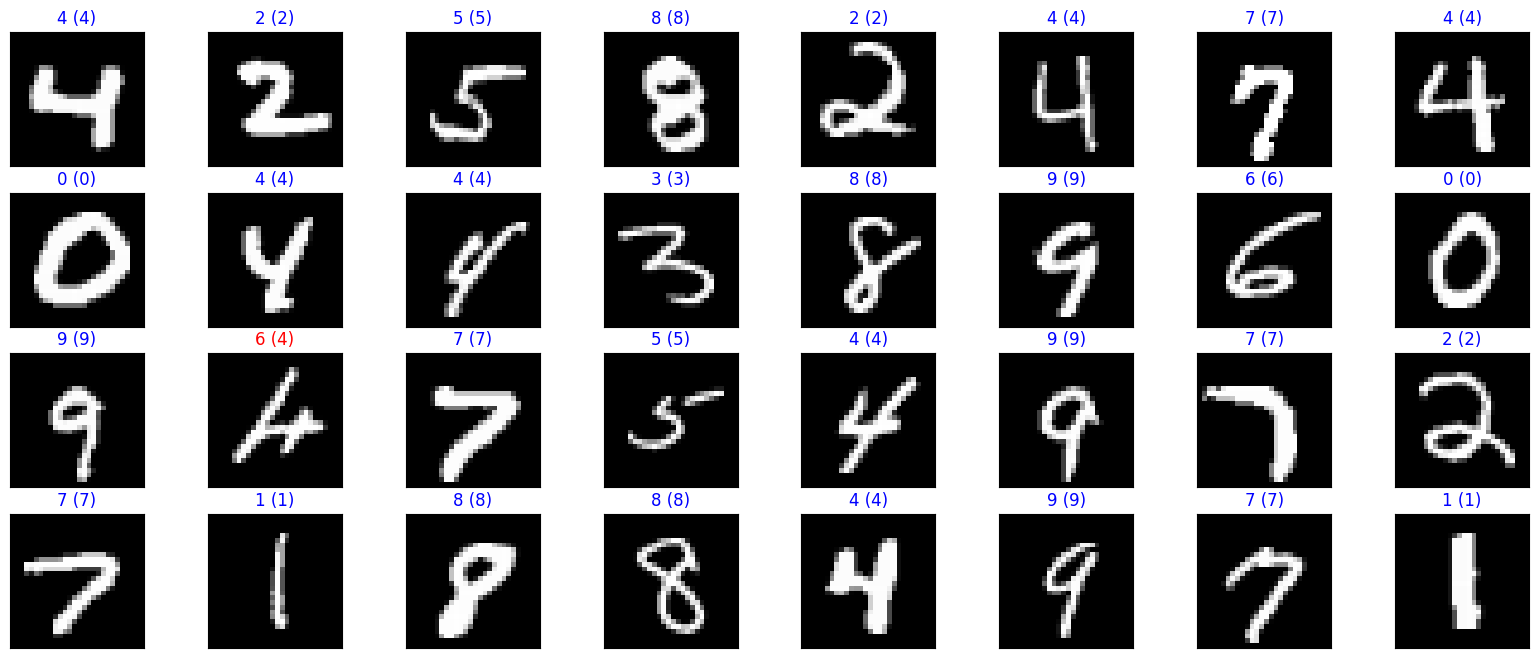

In [29]:
Handwritten_digits=[0,1,2,3,4,5,6,7,8,9]
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(test_images.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[idx]),cmap='gray')
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(test_labels[idx])
    ax.set_title("{} ({})".format(Handwritten_digits[pred_idx], Handwritten_digits[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9914 - loss: 0.0328


In [31]:
print('Accuracy for CNN:',test_acc)

Accuracy for CNN: 0.9929999709129333


##  Machine Learning Models

1. Logistic Regression
2. SVM -classifier
3. kNN-classifier
4. RandomForest-classifier
5. Decision Tree-classifier

### Importing libraries for Algorithms

In [32]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')

In [33]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist=fetch_openml('mnist_784')
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [34]:
x,y=mnist['data'],mnist['target']

In [35]:
x= x.astype('float32') / 255.0

In [36]:
y=y.astype(int)

In [37]:
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


In [38]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(56000, 784)
(14000, 784)
(56000,)


# Model Creation by using Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr= LogisticRegression()

In [42]:
lr.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred_lr =lr.predict(x_test)

In [44]:
y_pred_lr_train = lr.predict(x_train)

### Model Evaluation

In [45]:
accuracy_score(y_test,y_pred_lr)

0.9202857142857143

In [46]:
print(f"Logistic_Regression Accuracy Score test data :{accuracy_score(y_test,y_pred_lr)}")
print(f"Logistic_Regression Accuracy Score train data :{accuracy_score(y_train,y_pred_lr_train)}")

Logistic_Regression Accuracy Score test data :0.9202857142857143
Logistic_Regression Accuracy Score train data :0.9363392857142857


In [47]:
print(f"Logistic_Regression classification report for test data :{classification_report(y_test,y_pred_lr)}")
print(f"Logistic_Regression classification report for train data :{classification_report(y_train,y_pred_lr_train)}")

Logistic_Regression classification report for test data :              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.90      0.90      1433
           4       0.92      0.93      0.92      1295
           5       0.87      0.89      0.88      1273
           6       0.95      0.95      0.95      1396
           7       0.93      0.94      0.94      1503
           8       0.90      0.87      0.88      1357
           9       0.90      0.89      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

Logistic_Regression classification report for train data :              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5560
           1     

## Model Creation By Using KNN Classifier

In [48]:
knn = KNeighborsClassifier()

In [49]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
y_pred_knn = knn.predict(x_test)

In [51]:
y_pred_knn_train = knn.predict(x_train)

### Model Evaluation KNN - Classifier

In [52]:
print(f"KNN Accuracy Score test data :{accuracy_score(y_test,y_pred_knn)}")
print(f"KNN Accuracy Score train data :{accuracy_score(y_train,y_pred_knn_train)}")

KNN Accuracy Score test data :0.9700714285714286
KNN Accuracy Score train data :0.9808392857142857


In [53]:
# classification report for test data
print(f"KNN Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_knn)}")
# classification report for train  data
print(f"KNN Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_knn_train)}")

KNN Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.99      0.93      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

KNN Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5560
           1       

## Model Creation by Using SVM - Classifier

In [54]:
svc = SVC()

In [55]:
svc.fit(x_train, y_train)

SVC()

In [56]:
y_pred_svc = svc.predict(x_test)

In [57]:
y_pred_svc_train = svc.predict(x_train)

### Model Evaluation SVM - classifier

In [58]:
print(f"SVC Accuracy Score test data :{accuracy_score(y_test,y_pred_svc)}")
print(f"SVC Accuracy Score train data :{accuracy_score(y_train,y_pred_svc_train)}")

SVC Accuracy Score test data :0.9764285714285714
SVC Accuracy Score train data :0.9899464285714286


In [59]:
# classification report for test data
print(f"SVM - Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_svc)}")
# classification report for train data
print(f"SVM - Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_svc_train)}")

SVM - Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.96      0.97      1357
           9       0.97      0.96      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000

SVM - Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5560
           1   

## Model Creation By Using Decision Tree Classifier

In [60]:
dtc = DecisionTreeClassifier()

In [61]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
y_pred_dtc= dtc.predict(x_test)

In [63]:
y_pred_dtc_train=dtc.predict(x_train)

#### Model Evaluation Decision Tree

In [64]:
print(f"Decision Tree Accuracy Score test data :{accuracy_score(y_test,y_pred_dtc)}")
print(f"Decision Tree Accuracy Score train data :{accuracy_score(y_train,y_pred_dtc_train)}")

Decision Tree Accuracy Score test data :0.8691428571428571
Decision Tree Accuracy Score train data :1.0


In [65]:
# classification report for test data
print(f"decision Tree - Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_dtc)}")
# classification report for train data
print(f"Decision Tree - Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_dtc_train)}")

decision Tree - Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1343
           1       0.94      0.95      0.95      1600
           2       0.86      0.84      0.85      1380
           3       0.84      0.84      0.84      1433
           4       0.85      0.87      0.86      1295
           5       0.83      0.81      0.82      1273
           6       0.90      0.90      0.90      1396
           7       0.90      0.90      0.90      1503
           8       0.81      0.80      0.81      1357
           9       0.82      0.84      0.83      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000

Decision Tree - Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

### HyperParameter Tuning for Decision Tree

In [66]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    dtc, param_grid=param_grid,
    cv=3, scoring='accuracy',
    n_jobs=-1, verbose=2  # Added verbosity for better tracking
)

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [67]:
from sklearn.metrics import accuracy_score

# Get the best model from the search
best_dt_model = grid_search.best_estimator_

# Make predictions
y_pred_dtc = best_dt_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dtc)

# Print results
print("Test Accuracy with Best Hyperparameters:", accuracy)

Test Accuracy with Best Hyperparameters: 0.8255714285714286


## Model creation by using Random Forest Classifier

In [68]:
rfc=RandomForestClassifier()

In [69]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
y_pred_rfc=rfc.predict(x_test)

In [71]:
y_pred_rfc_train = rfc.predict(x_train)

## Model Evaluation Random Forest Classifier

In [72]:
print(f"Random Forest Accuracy Score test data :{accuracy_score(y_test,y_pred_rfc)}")
print(f"Random Forest Accuracy Score train data :{accuracy_score(y_train,y_pred_rfc_train)}")

Random Forest Accuracy Score test data :0.9677142857142857
Random Forest Accuracy Score train data :1.0


In [73]:
# classification report for test data
print(f"Random forest - Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_rfc)}")
# classification report for train data
print(f"Random forest - Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_rfc_train)}")

Random forest - Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Random forest - Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

## HyperParameter Tuning for Random Forest

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],  # Reduced range
    'max_depth': [10, 20],  # Removed 30
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    rfc, param_grid=param_grid,
    cv=2, scoring='accuracy',
    n_jobs=-1, verbose=2  # Added verbosity for tracking
)

# Use a subset of training data
x_train_sample, _, y_train_sample, _ = train_test_split(x_train, y_train, train_size=0.3, random_state=42)

# Fit the model
grid_search.fit(x_train_sample, y_train_sample)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [75]:
from sklearn.metrics import accuracy_score

# Get the best model from the search
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred_rfc = best_rf_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rfc)

# Print results
print("Test Accuracy with Best Hyperparameters:", accuracy)

Test Accuracy with Best Hyperparameters: 0.9551428571428572


## Conclusions:

* CNN Model: CNNs are well known for their exceptional performance in image recognition and processing tasks.

Accuracy Score : 0.9929999709129333

* Logistic Regression: Logistic Regression can be used as a baseline model for classifying handwritten digits by mapping pixel intensity values to probability scores for each digit (0-9).

Accuracy Score : 0.9202857142857143
   
* K Nearest Neighbors Classifier Model: The k-NN classifier is a simple, non-parametric algorithm that classifies data points based on the majority class of their nearest neighbors.

Accuracy Score : 0.9700714285714286
    
* SVM Classifier Model: The SVM classifier is a powerful supervised learning algorithm that finds the optimal hyperplane to separate data points into different classes.
    
Accuracy Score : 0.9764285714285714

* Decision Tree Classifier: Decision Tree Classifier is a supervised learning algorithm that splits data into branches based on feature conditions.

Accuracy Score : 0.8255714285714286
      
* Random Forest Classifier Model: The Random Forest classifier is an ensemble learning algorithm that combines multiple decision trees to improve accuracy, reduce overfitting, and enhance robustness.

Accuracy Score : 0.9551428571428572


- CNN is the best-performing model for handwritten digit recognition.
- Accuracy is above 99% for a well-trained model on MNIST.
- Overall Accuracy is High

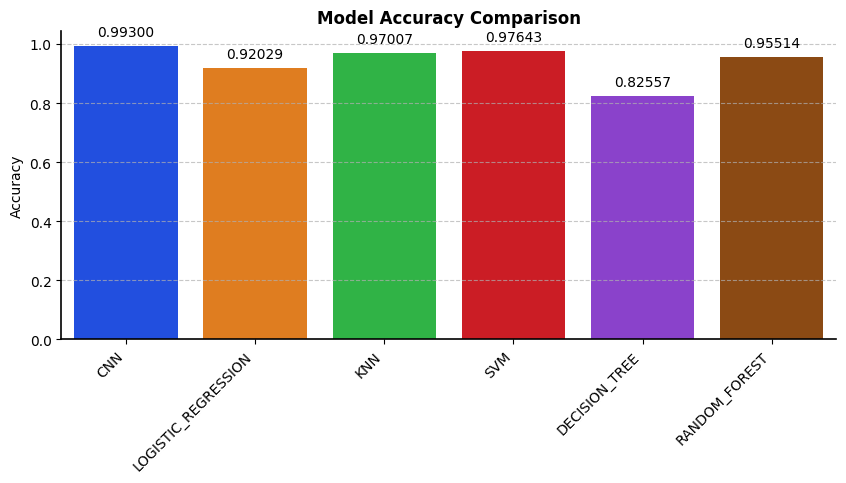

In [87]:
# Define models and accuracy values
Models = ['CNN', 'LOGISTIC_REGRESSION', 'KNN', 'SVM', 'DECISION_TREE', 'RANDOM_FOREST']
Accuracy = [0.992999, 0.920285, 0.970071, 0.976428, 0.825571, 0.955142]

plt.figure(figsize=(10, 4))
ax = sns.barplot(x=Models, y=Accuracy, palette="bright")


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.5f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

plt.xticks(rotation=45, ha='right')
plt.title("Model Accuracy Comparison", fontsize=12, fontweight='bold')
plt.ylabel("Accuracy", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Result:
In our exploration of various models for recognizing handwritten digits, the Convolutional Neural Network (CNN) emerged as the most effective choice. CNNs have proven to be particularly well-suited for image recognition tasks, as their architecture aligns seamlessly with the characteristics of handwritten digit datasets.

### Challenges Faced:
* Overfitting is Addressed using dropout, data augmentation, or batch normalization.
* Loading the dataset using Tensorflow
* Tuning hyperparameters for complex models such as random forests, decision tree and CNNs can be a time-intensive task, especially with large datasets. Efficiently optimizing these parameters to achieve peak performance across diverse models within a shorter timeframe remains a key challenge in machine learning.